In [2]:
import requests
URL = "https://trac.syr.edu/phptools/immigration/asylum/"
page = requests.get(URL)




In [5]:
import os

os.environ["PATH"] += os.pathsep + 'C:\\Users\\Joseph\\Downloads\\geckodriver.exe'

from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
opts = Options()
opts.headless = True
assert opts.headless  # Operating in headless mode
browser = Firefox(options=opts)
browser.get('https://duckduckgo.com')
# browser.implicitly_wait(0.5)

In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome

driver = webdriver.Chrome(service=webdriver.chrome.service.Service(executable_path="C:\\Users\\Joseph\\Downloads\\geckodriver.exe"))

driver.get("https://www.selenium.dev/selenium/web/web-form.html")

title = driver.title

TypeError: WebDriver.__init__() got an unexpected keyword argument 'service'

In [35]:
from selenium import webdriver
import os

os.environ["PATH"] += os.pathsep + 'C:\\Users\\Joseph\\Downloads\\geckodriver.exe'

driver_path_chrome = "C:\\Users\\Joseph\\Downloads\\chromedriver.exe"
binary_path_chrome = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"
binary_path_firefox = "C:\\Program Files\\Mozilla Firefox\\firefox.exe"

ops = webdriver.FirefoxOptions()
ops.binary_location = binary_path_firefox
ops.set_headless()
assert ops.headless

driver = webdriver.Firefox(executable_path=binary_path_firefox, options=ops)
driver.get('https://duckduckgo.com')

C:\Users\Joseph\AppData\Local\Temp\ipykernel_24588\3359253435.py:12: DeprecationWarning: use setter for headless property instead of set_headless
  ops.set_headless()


WebDriverException: Message: Service C:\Program Files\Mozilla Firefox\firefox.exe unexpectedly exited. Status code was: 0


In [36]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

binary = "C:\\Program Files\\Mozilla Firefox\\firefox.exe"
options = Options()
options.binary = binary
cap = DesiredCapabilities().FIREFOX.copy()
cap["marionette"] = True #optional
driver = webdriver.Firefox(firefox_options=options, capabilities=cap, executable_path='C:\\Users\\Joseph\\Downloads\\geckodriver.exe')
driver.get("http://google.com/")
print ("Firefox Initialized")
driver.quit()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_24588\3020247994.py:10: DeprecationWarning: use options instead of firefox_options
  driver = webdriver.Firefox(firefox_options=options, capabilities=cap, executable_path='C:\\Users\\Joseph\\Downloads\\geckodriver.exe')


ValueError: Timeout value connect was <object object at 0x000001FE401448C0>, but it must be an int, float or None.

I want to scrape the Syracuse TRAC Tool for immigration decisions so I can build a pandas dataset with enough axes to satisfy my viz interests

# Real Python Scraper Tutorial
https://realpython.com/modern-web-automation-with-python-and-selenium/

### Test Driving a Headless Browser

In [7]:
import os

os.environ["PATH"] += os.pathsep + 'C:\\Users\\Joseph\\Downloads\\geckodriver.exe'

In [9]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options

opts = Options()
opts.headless = True

browser = Firefox(options=opts)
# browser.get('https://trac.syr.edu/phptools/immigration/asylum/')
browser.get('https://duckduckgo.com')

In [12]:
from selenium.webdriver.common.by import By
search_form = browser.find_element(By.ID, 'searchbox_input')
search_form.send_keys('real python')

In [15]:
search_form.submit()

In [23]:
results = browser.find_elements(By.TAG_NAME, 'article')

In [26]:
print(results[0].text)

https://realpython.com
Python Tutorials - Real Python
Real Python Tutorials offers free online courses and videos on Python basics, intermediate and advanced topics, such as lists, tuples, data-structures, data-science, web-dev, and more. You can also access quizzes, books, podcasts, and community resources to enhance your Python skills and career.
Sign‑In
Forgot Password? By signing in, you agree to our Terms of Service and Privacy Policy, which we may update from time to time.We'll occasionally send you account ...
Quizzes Check your learning progress
Quizzes Check your learning progress - Python Tutorials - Real Python
Browse Topics Focus on a specific area or skill level
Python Best Practices Learn how to use Python features idiomatically and what sets Python apart from other languages. Discover how Python coding differs from other languages. This will help you write cleaner, more efficient, and more Pythonic code. Topic Python Career
Community Chat Learn with other Pythonistas
Joi

In [27]:
browser.close()

### Groovin’ on Tunes

In [7]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By

opts = Options()
# opts.add_argument('--headless')

browser = Firefox(options=opts)
browser.get('https://bandcamp.com')
browser.find_element(By.CLASS_NAME, 'playbutton').click()

In [8]:
tracks = browser.find_elements(By.CLASS_NAME, 'discover-item')

In [9]:
tracks[3].click()

In [13]:
next_button = [e for e in browser.find_elements(By.CLASS_NAME, 'item-page') if e.text.lower().find('next') > -1]

In [17]:
next_button[0].click()

In [18]:
tracks = browser.find_elements(By.CLASS_NAME, 'discover-item')

In [19]:
len(tracks)

16

In [24]:
discover_section = browser.find_element(By.CLASS_NAME, 'discover-results')
left_x = discover_section.location['x']
right_x = left_x + discover_section.size['width']
discover_items = browser.find_elements(By.CLASS_NAME, 'discover-item')
tracks = [t for t in discover_items if t.location['x'] >= left_x and t.location['x'] < right_x]

In [26]:
len(tracks)

8

In [27]:
browser.close()

### Building a Class

In [31]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from time import sleep, ctime
from collections import namedtuple
from threading import Thread
from os.path import isfile
import csv

BANDCAMP_FRONTPAGE = 'https://bandcamp.com/'

class BandLeader():
    def __init__(self):
        # Create a browser
        opts = Options()
        # opts.add_argument('--headless')
        self.browser = Firefox(options=opts)
        self.browser.get(BANDCAMP_FRONTPAGE)

        # Track list related state
        self._current_track_number = 1
        self.track_list = []
        self.tracks()

    def tracks(self):
        '''Query page to populate a list of available tracks'''
        # Sleep to give browser time to renfer and finish any animations
        sleep(1)

        # Get the container for the visible track list
        discover_section = self.browser.find_element(By.CLASS_NAME, 'discover-results')
        left_x = discover_section.location['x']
        right_x = left_x + discover_section.size['width']

        # Filter the items in the list to include only those we can click
        discover_items = self.browser.find_elements(By.CLASS_NAME, 'discover-itme')
        self.track_list = [t for t in discover_items if t.location['x'] >= left_x and t.location['x'] < right_x]

        # Print the available tracks to the screen
        for (i, track) in enumerate(self.track_list):
            print(f'[{i+1}]')
            lines = track.text.split('\n')
            print(f'Album : {lines[0]}')
            print(f'Artist : {lines[1]}')
            if len(lines) > 2:
                print(f'Genre : {lines[2]}')

    
    def catalogue_pages(self):
        '''Print the available pages in the catalogue that are currently accessible'''
        print('PAGES')
        for e in self.browser.find_elements(By.CLASS_NAME, 'item-page'):
            print(e.text)
        print('')

    def more_tracks(self, page='next'):
        '''Advance the catalogue and repopulate the track list. We can pass in
        a number to advance to any of the available pages.'''
        next_button = [e for e in self.browser.find_elements(By.CLASS_NAME, 'item-page') if e.text.lower().strip() == str(page)]

        if next_button:
            next_button[0].click()
            self.tracks()

    def play(self, track=None):
        '''Play a track. If no track number is provided, the currently selected track will play.'''
        if track is None:
            self.browser.find_element(By.CLASS_NAME, 'playbutton').click()
        elif type(track) is int and track <= len(self.track_list) and track >=1:
            self._current_track_number = track
            self.track_list[self._current_track_number - 1].click()

    def play_next(self):
        '''Play the next available track'''
        if self._current_track_number < len(self.track_list):
            self.play(self._current_track_number + 1)
        else:
            self.more_tracks()
            self.play(1)

    def pause(self):
        self.play()

In [32]:
a = BandLeader()

In [33]:
a.play()

In [34]:
a.play_next()

In [35]:
a.catalogue_pages()

PAGES
previous
1
2
3
4
5
6
7
...
200
next



In [36]:
a.more_tracks()

In [40]:
a.pause()

### Collecting Structured Data

In [41]:
TrackRec = namedtuple('TrackRec', [
    'title', 
    'artist',
    'artist_url', 
    'album',
    'album_url', 
    'timestamp'  # When you played it
])


In [69]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from time import sleep, ctime
from collections import namedtuple
from threading import Thread
from os.path import isfile
import csv

BANDCAMP_FRONTPAGE = 'https://bandcamp.com/'

class BandLeader():
    def __init__(self, csvpath=None):
        # Create a browser
        opts = Options()
        # opts.add_argument('--headless')
        self.browser = Firefox(options=opts)
        self.browser.get(BANDCAMP_FRONTPAGE)

        # Track list-related state
        self._current_track_number = 1
        self.track_list = []
        self.tracks()

        # State for the database
        self.database_path = csvpath
        self.database = []
        self._current_track_record = None

        # Load db from disk if possible
        if isfile(self.database_path):
            with open(self.database_path, newline='') as dbfile:
                db_reader = csv.reader(dbfile)
                next(db_reader) #to ignore the header line
                self.database = [TrackRec._make(rec) for rec in db_reader]

        # The database maintenance thread
        self.thread = Thread(target=self._maintain)
        self.thread.daemon = True       # kills the thread if the main process dies
        self.thread.start()

        self.tracks()

    def _maintain(self):
        while True:
            self._update_db()
            sleep(20)       #check every 20 seconds

    def _update_db(self):
        '''Only update db if a track is playing 
                             and it has a record 
                             and either the db is empty 
                                 or the last db entry is not identical 
                                    to the current track's record
                           '''
        try:
            check = (self._current_track_record is not None
                     and (len(self.database) == 0
                          or self.database[-1] != self._current_track_record)
                     and self.is_playing())
            if check:
                self.database.append(self._current_track_record)
                self.save_db()

        except Exception as e:
            print(f'error while updating the db: {e}')

    def save_db(self):
        with open(self.database_path, 'w', newline='') as dbfile:
            db_writer = csv.writer(dbfile)
            db_writer.writerow(list(TrackRec._fields))  #header row
            for entry in self.database:
                db_writer.writerow(list(entry))

    def tracks(self):
        '''Query page to populate a list of available tracks'''
        # Sleep to give browser time to renfer and finish any animations
        sleep(1)

        # Get the container for the visible track list
        discover_section = self.browser.find_element(By.CLASS_NAME, 'discover-results')
        left_x = discover_section.location['x']
        right_x = left_x + discover_section.size['width']

        # Filter the items in the list to include only those we can click
        discover_items = self.browser.find_elements(By.CLASS_NAME, 'discover-item')
        self.track_list = [t for t in discover_items if t.location['x'] >= left_x and t.location['x'] < right_x]

        # Print the available tracks to the screen
        for (i, track) in enumerate(self.track_list):
            print(f'[{i+1}]')
            lines = track.text.split('\n')
            print(f'Album : {lines[0]}')
            print(f'Artist : {lines[1]}')
            if len(lines) > 2:
                print(f'Genre : {lines[2]}')
    
    def catalogue_pages(self):
        '''Print the available pages in the catalogue that are currently accessible'''
        print('PAGES')
        for e in self.browser.find_elements(By.CLASS_NAME, 'item-page'):
            print(e.text)
        print('')

    def more_tracks(self, page='next'):
        '''Advance the catalogue and repopulate the track list. We can pass in
        a number to advance to any of the available pages.'''
        next_button = [e for e in self.browser.find_elements(By.CLASS_NAME, 'item-page') if e.text.lower().strip() == str(page)]

        if next_button:
            next_button[0].click()
            self.tracks()

    def play(self, track=None):
        '''Play a track. If no track number is provided, the currently selected track will play.'''
        if track is None:
            self.browser.find_element(By.CLASS_NAME, 'playbutton').click()
        elif type(track) is int and track <= len(self.track_list) and track >=1:
            self._current_track_number = track
            self.track_list[self._current_track_number - 1].click()

        sleep(0.5)
        if self.is_playing():
            self._current_track_record = self.currently_playing()

    def play_next(self):
        '''Play the next available track'''
        if self._current_track_number < len(self.track_list):
            self.play(self._current_track_number + 1)
        else:
            self.more_tracks()
            self.play(1)

    def pause(self):
        self.play()

    def is_playing(self):
        '''
        Returns `True` if a track is presently playing
        '''
        playbtn = self.browser.find_element(By.CLASS_NAME, 'playbutton')
        return playbtn.get_attribute('class').find('playing') > -1

    def currently_playing(self):
        '''
        Returns the record for the currently playing track,
        or None if nothing is playing
        '''
        try:
            if self.is_playing():
                title = self.browser.find_element(By.CLASS_NAME, 'title').text
                
                album_detail = self.browser.find_element(By.CSS_SELECTOR, '.detail-album > a')
                album_title = album_detail.text
                album_url = album_detail.get_attribute('href').split('?')[0]

                artist_detail = self.browser.find_element(By.CSS_SELECTOR, '.detail-artist > a')
                artist = artist_detail.text
                artist_url = artist_detail.get_attribute('href').split('?')[0]

                return TrackRec(title, artist, artist_url, album_title, album_url, ctime())

        except Exception as e:
            print(f'there was an error: {e}')

        return None


In [70]:
b = BandLeader(csvpath="C:\\Users\\Joseph\\Downloads\\test.csv")

[1]
Album : The Fearless Flyers IV
Artist : The Fearless Flyers
[2]
Album : She Reaches Out To She Reaches Out To She
Artist : CHELSEA WOLFE
Genre : alternative
[3]
Album : Sparagmos
Artist : Spectral Voice
Genre : metal
[4]
Album : Extents
Artist : SVLBRD
Genre : ambient
[5]
Album : Phantoma
Artist : Unleash The Archers
Genre : metal
[6]
Album : The One Who Runs Away Is the Ghost Soundtrack
Artist : Hainbach
Genre : electronic
[7]
Album : All Life Long
Artist : Kali Malone
Genre : experimental
[8]
Album : New Twilight Music Vol. 1
Artist : Midwest Collective
[1]
Album : The Fearless Flyers IV
Artist : The Fearless Flyers
[2]
Album : She Reaches Out To She Reaches Out To She
Artist : CHELSEA WOLFE
Genre : alternative
[3]
Album : Sparagmos
Artist : Spectral Voice
Genre : metal
[4]
Album : Extents
Artist : SVLBRD
Genre : ambient
[5]
Album : Phantoma
Artist : Unleash The Archers
Genre : metal
[6]
Album : The One Who Runs Away Is the Ghost Soundtrack
Artist : Hainbach
Genre : electronic
[7

In [71]:
b.catalogue_pages()
b.play(2)

PAGES
previous
1
2
3
4
5
6
7
...
200
next



In [64]:
b.more_tracks()


In [66]:
b.browser.close()

In [72]:
b.play_next()

In [73]:
b.more_tracks()

[1]
Album : The Beginning (My God)
Artist : Humanist
Genre : alternative
[2]
Album : Listening To The Stones
Artist : Youga
Genre : ambient
[3]
Album : Artikal Intelligence
Artist : Prince Fatty
Genre : reggae
[4]
Album : Unleashed
Artist : BoggDogg
Genre : electronic
[5]
Album : XIII
Artist : GaMetal
Genre : metal
[6]
Album : CHASER
Artist : Femtanyl
Genre : electronic
[7]
Album : Wall Of Eyes
Artist : The Smile
Genre : alternative
[8]
Album : Mosawi Swiri
Artist : Houssam Gania
Genre : world


In [74]:
b.play(2)

In [75]:
b.browser.close()

# Scraping the Sracuse TRAC

In [2]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By

ops = Options()
ops.add_argument('--headless')
browser = Firefox(options=ops)
browser.get('https://trac.syr.edu/phptools/immigration/asylum/')
browser.implicitly_wait(15)

ValueError: Timeout value connect was <object object at 0x10e380b80>, but it must be an int, float or None.

Trying to do it manually (more generalizeable to other TRAC tools)

In [390]:
# Get top-level data list buttons
axis_buttons = browser.find_elements(By.CLASS_NAME, 'truncate')
axis_button_text = [e.text for e in axis_buttons]
for b in axis_buttons:
    print(b.text)

Immigration Court
Represented
Decision


In [391]:
# Open first axis option list and get list entries
axis_buttons[0].click()

# Set the first axis to 'Fiscal Year of Decision'
axis_value = 'Fiscal Year of Decision'
axis1_options = [e for e in browser.find_elements(By.CLASS_NAME, "truncate") if e.text not in axis_button_text]
# axis1_options = browser.find_elements(By.ID, 'headlessui-listbox-options-2')
axis1_options_text = [e.text for e in axis1_options]
axis1_options[axis1_options_text.index(axis_value)].click()

# Re-calculate axis button text
axis_button_text = [e.text for e in axis_buttons]

In [392]:
# Open second axis option list and get list entries
axis_buttons[1].click()

# Set the second axis to 'Nationality'
axis_value = 'Nationality'
axis2_options = [e for e in browser.find_elements(By.CLASS_NAME, "truncate") if e.text not in axis_button_text]
axis2_options_text = [e.text for e in axis2_options]
axis2_options[axis1_options_text.index(axis_value)].click()

# Re-calculate axis button text
axis_button_text = [e.text for e in axis_buttons]

In [393]:
# Get list of tables
tables = browser.find_elements(By.CLASS_NAME, 'table-fixed')

In [1]:
# Get data along first axis
tables = browser.find_elements(By.CLASS_NAME, 'table-fixed')
table1_text = tables[0].text.split('\n')
_ = table1_text.pop(0)
table1_text = [line.replace(',','').split(' ') for line in table1_text]
# table1_text.sort()
table1_text = [[int(i[0]), int(i[1])] for i in table1_text]
years, yearly_totals = zip(*table1_text)

NameError: name 'browser' is not defined

In [332]:
table2_text = tables[1].text.split('\n')
_ = table2_text.pop(0)
table2_text = [line.replace(',','').rsplit(' ', 1) for line in table2_text]
table2_text
# table2_text.sort()
table2_text = [[i[0], int(i[1])] for i in table2_text]
nationalities, nationalitywise_totals = zip(*table2_text)

In [394]:
import time
# Get list of entries along first axis (to be clicked on one by one)
table1_rows = tables[0].find_elements(By.CLASS_NAME, 'flex-row')
table1_rows = [row for row in table1_rows if row.text != '' and row.text.find('All') == -1 and not any(t in row.text for t in ['2023', '2019', '2020', '2022', '2018', '2003', '2004', '2005', '2017', '2006', '2002', '2007', '2021', '2001'])]

# Initialize data dict
data = {}

# Iterate over each year
for t1_row in table1_rows:
    # Calculate year and initialize data dictionary entry
    year = int(t1_row.text.rsplit(' ', 1)[0])
    data[year] = {}

    # Click on the row
    t1_row.click()

    # Recalculate Tables
    tables = browser.find_elements(By.CLASS_NAME, 'table-fixed')

    # Get list of entries along second axis (to be clicked on one by one)
    table2_rows = tables[1].find_elements(By.CLASS_NAME, 'flex-row')
    table2_rows = [row for row in table2_rows if row.text != '' and row.text.find('All') == -1]
    
    # Iterate over each nationality for current year
    for t2_row in table2_rows:
        # Calculate Nationality
        nationality = t2_row.text.rsplit(' ', 1)[0]

        # Click on the row
        t2_row.click()

        # Recalculate Tables
        tables = browser.find_elements(By.CLASS_NAME, 'table-fixed')

        # Get a list of entries along third axis (to be copied as-is)
        time.sleep(0.2)
        table3_rows = tables[2].find_elements(By.CLASS_NAME, 'flex-row')
        table3_rows = [row for row in table3_rows if row.text != '' and row.text.find('All') == -1]
        table3_text = [row.text.replace(',', '').rsplit(' ', 1) for row in table3_rows]
        table3_text = {row[0]: int(row[1]) for row in table3_text}

        # Add to data dictionary
        data[year][nationality] = table3_text



In [397]:
data.keys()

dict_keys([2008, 2016, 2024, 2011, 2009, 2012, 2013, 2014, 2010, 2015])

In [382]:
t1_row.text

'2008 24,072'

In [384]:
nationality

'Greece'

In [412]:
data.keys()

dict_keys([2008, 2016, 2024, 2011, 2009, 2012, 2013, 2014, 2010, 2015])

In [373]:
# data3 = {**data1, **data2}
data3.keys()

dict_keys([2023, 2019, 2020, 2022, 2018, 2003, 2004, 2005])

In [386]:
data4 = {**data3, **data}

In [398]:
data5 = {**data4, **data}

In [401]:
data5.keys()

dict_keys([2023, 2019, 2020, 2022, 2018, 2003, 2004, 2005, 2017, 2006, 2002, 2007, 2021, 2001, 2008, 2016, 2024, 2011, 2009, 2012, 2013, 2014, 2010, 2015])

In [411]:
import pandas as pd 

data5_df = pd.concat({k: pd.DataFrame(v).T for k, v in data5.items()}, axis=0) # https://stackoverflow.com/a/54300940
data5_df.to_hdf('C:\\Users\\Joseph\\UMich_MSE_PhD\\UMich_SI649_InformationVisualization\\Project_StaticViz\\TRAC_AsylumDecisions_Raw.hdf', key='AsylumDecisions_2021to2024')

Testing whether I need to pre-load all the countries etc into the df before I actually go and get the data

In [303]:
test_dict = {'A': {'a': {'x': 1, 'y': 2, 'z': 3},
                   'b': {'x':4, 'y': 5, 'z': 6}},
             'B': {'a': {'x': 1, 'y': 2, 'z': 3},
                   'b': {'x':4, 'y': 5, 'z': 6}},
             'C': {'a': {'x': 1, 'y': 2, 'z': 3},
                   'c': {'x':4, 'y': 5, 'z': 6}}}
b = pd.json_normalize(test_dict, sep='_')    #https://stackoverflow.com/a/41801708
c = b.to_dict(orient='records')[0]

d = pd.DataFrame.from_dict(c, orient='index') # https://stackoverflow.com/a/64464626
d.index = pd.MultiIndex.from_tuples(d.index.str.split('_').map(tuple))
d = d.unstack(level=[0,1]).droplevel(axis=1, level=0)     #not strictly necessary
d

# I think I can just populate the DF and then check and add any missing columns afterwards

A     B     C   
   a  b  a  b  a  c
x  1  4  1  4  1  4
y  2  5  2  5  2  5
z  3  6  3  6  3  6

Figuring out how to convert data dict to DataFrame and then how to write DataFrame to disk

In [242]:
import pandas as pd
a = pd.DataFrame.from_dict(data)
a

C:\Users\Joseph\AppData\Local\Temp\ipykernel_32540\4219925229.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,2001,2002
Afghanistan,"{'Asylum Granted': 134, 'Asylum Relief Denied'...","{'Asylum Granted': 74, 'Asylum Relief Denied':..."
Albania,"{'Asylum Relief Denied': 514, 'Asylum Granted'...","{'Asylum Relief Denied': 801, 'Asylum Granted'..."


In [263]:
b = pd.json_normalize(data, sep='_')    #https://stackoverflow.com/a/41801708
c = b.to_dict(orient='records')[0]

d = pd.DataFrame.from_dict(c, orient='index') # https://stackoverflow.com/a/64464626
d.index = pd.MultiIndex.from_tuples(d.index.str.split('_').map(tuple))
d = d.unstack(level=[0,1]).droplevel(axis=1, level=0)     #not strictly necessary
d

2001                2002        
                     Afghanistan Albania Afghanistan Albania
Asylum Granted               134     513          74     515
Asylum Relief Denied          20     514          52     801
Other Relief Granted           7       9           4       4

In [278]:
d['2001','Afghanistan']

Asylum Granted          134
Asylum Relief Denied     20
Other Relief Granted      7
Name: (2001, Afghanistan), dtype: int64

In [275]:
# alternatively...          https://stackoverflow.com/a/54300940
e = pd.concat({k: pd.DataFrame(v).T for k, v in data.items()}, axis=0)
e

Asylum Granted  Asylum Relief Denied  Other Relief Granted
2001 Afghanistan             134                    20                     7
     Albania                 513                   514                     9
2002 Afghanistan              74                    52                     4
     Albania                 515                   801                     4

In [404]:
e.to_hdf('C:\\Users\\Joseph\\UMich_MSE_PhD\\UMich_SI649_InformationVisualization\\Project_StaticViz\\test.hdf', key='testkey')

In [406]:
h = pd.read_hdf('C:\\Users\\Joseph\\UMich_MSE_PhD\\UMich_SI649_InformationVisualization\\Project_StaticViz\\test.hdf')
h.loc[(2001)]

,Asylum Granted,Asylum Relief Denied,Other Relief Granted
Afghanistan,134,20,7
Albania,513,514,9


In [276]:
e.loc[(2001)]

,Asylum Granted,Asylum Relief Denied,Other Relief Granted
Afghanistan,134,20,7
Albania,513,514,9


In [280]:
d.axes

[Index(['Asylum Granted', 'Asylum Relief Denied', 'Other Relief Granted'], dtype='object'),
 MultiIndex([('2001', 'Afghanistan'),
             ('2001',     'Albania'),
             ('2002', 'Afghanistan'),
             ('2002',     'Albania')],
            )]

In [281]:
e.axes

[MultiIndex([(2001, 'Afghanistan'),
             (2001,     'Albania'),
             (2002, 'Afghanistan'),
             (2002,     'Albania')],
            ),
 Index(['Asylum Granted', 'Asylum Relief Denied', 'Other Relief Granted'], dtype='object')]

# Pre-Processing TRAC Asylum Decision Data For Plotting

Import Data from HDF

In [2]:
import pandas as pd

filepath_win = 'C:\\Users\\Joseph\\UMich_MSE_PhD\\UMich_SI649_InformationVisualization\\Project_StaticViz\\TRAC_AsylumDecisions_Raw.hdf'
filepath_mac = '/Users/joaburkh/Library/CloudStorage/GoogleDrive-joaburkh@umich.edu/Other computers/My Laptop/UMich_MSE_PhD/UMich_SI649_InformationVisualization/Project_StaticViz/TRAC_AsylumDecisions_Raw.hdf'

data_df = pd.read_hdf(filepath_win, key='AsylumDecisions_2021to2024')  # note: I accidentally saved the same data twice to this HDF, so I have to specify which key to use - the choice does not matter - also the key name has the wrong date range :(
data_df.rename_axis(('Year', 'Nationality'), inplace=True)                        # rename indices for clarity

Make sure that every year has same country rows and every country has the same decision columns

In [3]:
# Check for same columns
data_df

# Note: NaN values indicate all columns occur for every row

Asylum Relief Denied  Asylum Granted  \
Year Nationality                                             
2023 El Salvador                    4788.0          3143.0   
     Honduras                       5427.0          2192.0   
     Guatemala                      4907.0          2590.0   
     China                           803.0          3722.0   
     Venezuela                      1246.0          3018.0   
...                                    ...             ...   
2015 Singapore                         NaN             1.0   
     Estonia                           NaN             1.0   
     Slovak Republic                   NaN             1.0   
     Kuwait                            NaN             1.0   
     North Korea                       1.0             NaN   

                      Other Relief Granted  
Year Nationality                            
2023 El Salvador                     164.0  
     Honduras                        123.0  
     Guatemala                       111.0  
     China                            45.0  
     Venezuela                        37.0  
...                                    ...  
2015 Singapore                         NaN  
     Estonia                           NaN  
     Slovak Republic                   NaN  
     Kuwait                            NaN  
     North Korea                       NaN  

[4003 rows x 3 columns]

In [4]:
# Rectify missing country rows
unique_index1 = data_df.index.unique(0)
unique_index2 = data_df.index.unique(1)

new_index = pd.MultiIndex.from_product([unique_index1, unique_index2])

data_df = data_df.reindex(new_index, axis='index')


with pd.option_context('display.max_rows', 250):
    display(data_df.loc[(2015)])

,Asylum Relief Denied,Asylum Granted,Other Relief Granted
Nationality,,,
El Salvador,1591.0,351.0,37.0
Honduras,1273.0,344.0,27.0
Guatemala,1036.0,419.0,34.0
China,819.0,3894.0,30.0
Venezuela,48.0,40.0,1.0
Ecuador,80.0,44.0,8.0
India,224.0,336.0,3.0
Mexico,1824.0,220.0,60.0
Brazil,18.0,6.0,2.0


In [5]:
# Change all NaN values to 0
data_df = data_df.fillna(value=0.0)

# Re-order DF by year (ascending) and country (ascending)
data_df = data_df.sort_index()
with pd.option_context('display.max_rows', 250):
    display(data_df)


Asylum Relief Denied  Asylum Granted  \
Year Nationality                                              
2001 Afghanistan                       20.0           134.0   
     Albania                          514.0           513.0   
     Algeria                           24.0            26.0   
     Andorra                            1.0             0.0   
     Angola                            12.0             9.0   
...                                     ...             ...   
2024 Withheld by EOIR                   0.0             0.0   
     Yemen                              8.0             9.0   
     Zaire                              0.0             0.0   
     Zambia                             1.0             0.0   
     Zimbabwe                           3.0             4.0   

                       Other Relief Granted  
Year Nationality                             
2001 Afghanistan                        7.0  
     Albania                            9.0  
     Algeria                            0.0  
     Andorra                            0.0  
     Angola                             0.0  
...                                     ...  
2024 Withheld by EOIR                   0.0  
     Yemen                              0.0  
     Zaire                              0.0  
     Zambia                             0.0  
     Zimbabwe                           0.0  

[5520 rows x 3 columns]

Merge Duplicate Country Names (identified manually)

In [6]:
dups = [
    ['Byelorussia (Belarus)', 'Belarus'],
    ['Holland', 'Netherlands'],
    ['Be Removed Fr...United States', 'Be Removed From the United States'],
    ['British India...ean Territory', 'British Indian Ocean Territory'],
    ['Federated Sta...of Micronesia', 'Federated States of Micronesia'],
    ['St. Vincent a...he Grenadines', 'St. Vincent and the Grenadines'],
    ['Stateless - A...ame A Country', 'Stateless - Alien Unable To Name A Country'],
    ['The Republic ...shall Islands', 'The Republic of the Marshall Islands']
]
for year in data_df.index.unique(0):
    for dup, orig in dups:
        if (dup in data_df.loc[year].index.unique(0)):
            data_df.rename(index={dup: orig}, inplace=True)   
            data_df = data_df.groupby(level=[0,1]).sum()                              # Sum the now-identical rows

Assign Regional Names to Countries (identified manually)

In [7]:
filename_win = "C:\\Users\\Joseph\\UMich_MSE_PhD\\UMich_SI649_InformationVisualization\\Project_StaticViz\\possible_nationalities.csv"
filename_mac = '/Users/joaburkh/Library/CloudStorage/GoogleDrive-joaburkh@umich.edu/Other computers/My Laptop/UMich_MSE_PhD/UMich_SI649_InformationVisualization/Project_StaticViz/possible_nationalities.csv'

region_df = pd.read_csv(filename_win, usecols=[0,1,2])
region_df.set_index('Nationality', inplace=True)

data_df = data_df.join(region_df)

In [8]:
data_df.set_index('Region', append=True, inplace=True)
data_df.set_index('Subregion', append=True, inplace=True)
data_df = data_df.reorder_levels(['Year', 'Region', 'Subregion', 'Nationality'])
data_df.sort_index(inplace=True)

Add a Total Column to make plotting easier

In [9]:
data_df['Total'] = data_df.sum(axis=1)

In [10]:
data_df

Asylum Relief Denied  \
Year Region        Subregion              Nationality                                                        
2001 Africa        Central Africa         Burundi                                                     19.0   
                                          Central African Republic                                     1.0   
                                          Congo                                                       88.0   
                                          Democratic Republic of Congo                                10.0   
                                          Rwanda                                                      12.0   
...                                                                                                    ...   
2024 South America Northern South America Venezuela                                                  370.0   
                   Western South America  Peru                                                       603.0   
     Stateless     Stateless              No Nationality                                               0.0   
                                          Stateless - Alien Unable To Name A Country                   2.0   
     Subantarctica Subantarctica          Bouvet Island                                                0.0   

                                                                                      Asylum Granted  \
Year Region        Subregion              Nationality                                                  
2001 Africa        Central Africa         Burundi                                               11.0   
                                          Central African Republic                               3.0   
                                          Congo                                                128.0   
                                          Democratic Republic of Congo                           6.0   
                                          Rwanda                                                24.0   
...                                                                                              ...   
2024 South America Northern South America Venezuela                                            959.0   
                   Western South America  Peru                                                 171.0   
     Stateless     Stateless              No Nationality                                         0.0   
                                          Stateless - Alien Unable To Name A Country             8.0   
     Subantarctica Subantarctica          Bouvet Island                                          0.0   

                                                                                      Other Relief Granted  \
Year Region        Subregion              Nationality                                                        
2001 Africa        Central Africa         Burundi                                                      2.0   
                                          Central African Republic                                     0.0   
                                          Congo                                                        5.0   
                                          Democratic Republic of Congo                                 0.0   
                                          Rwanda                                                       1.0   
...                                                                                                    ...   
2024 South America Northern South America Venezuela                                                    2.0   
                   Western South America  Peru                                                         1.0   
     Stateless     Stateless              No Nationality                                               0.0   
                                          Stateless - Alien Unable To Name A Country        

Convert all floats to int (cannot have fractions of people)

In [11]:
float_cols = data_df.select_dtypes(include=['float64']) # This will select float columns only
for col in float_cols.columns.values:
    data_df[col] = data_df[col].astype('int64')

data_df

Asylum Relief Denied  \
Year Region        Subregion              Nationality                                                        
2001 Africa        Central Africa         Burundi                                                       19   
                                          Central African Republic                                       1   
                                          Congo                                                         88   
                                          Democratic Republic of Congo                                  10   
                                          Rwanda                                                        12   
...                                                                                                    ...   
2024 South America Northern South America Venezuela                                                    370   
                   Western South America  Peru                                                         603   
     Stateless     Stateless              No Nationality                                                 0   
                                          Stateless - Alien Unable To Name A Country                     2   
     Subantarctica Subantarctica          Bouvet Island                                                  0   

                                                                                      Asylum Granted  \
Year Region        Subregion              Nationality                                                  
2001 Africa        Central Africa         Burundi                                                 11   
                                          Central African Republic                                 3   
                                          Congo                                                  128   
                                          Democratic Republic of Congo                             6   
                                          Rwanda                                                  24   
...                                                                                              ...   
2024 South America Northern South America Venezuela                                              959   
                   Western South America  Peru                                                   171   
     Stateless     Stateless              No Nationality                                           0   
                                          Stateless - Alien Unable To Name A Country               8   
     Subantarctica Subantarctica          Bouvet Island                                            0   

                                                                                      Other Relief Granted  \
Year Region        Subregion              Nationality                                                        
2001 Africa        Central Africa         Burundi                                                        2   
                                          Central African Republic                                       0   
                                          Congo                                                          5   
                                          Democratic Republic of Congo                                   0   
                                          Rwanda                                                         1   
...                                                                                                    ...   
2024 South America Northern South America Venezuela                                                      2   
                   Western South America  Peru                                                           1   
     Stateless     Stateless              No Nationality                                                 0   
                                          Stateless - Alien Unable To Name A Country        

Save Pre-processed DataFrame to disk

In [12]:
data_df.to_hdf('TRAC_AsylumDecisions_Cleaned.hdf', key='AsylumDecisions_2001to2024')

# Plotting TRAC Asylum Decision Data

Tutorials on making a Sankey Diagram

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
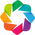

:Sankey   [start,end]   (Value)

In [1]:
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')

sankey = hv.Sankey([
    ['A', 'X', 5],
    ['A', 'Y', 7],
    ['A', 'Z', 6],
    ['B', 'X', 2],
    ['B', 'Y', 9],
    ['B', 'Z', 4]]
)
sankey.opts(width=600, height=400)


In [16]:
nodes = ["PhD", 
         "Career Outside Science",  
         "Early Career Researcher", 
         "Research Staff",
         "Permanent Research Staff",  
         "Professor",  
         "Non-Academic Research"]
nodes = hv.Dataset(enumerate(nodes), 'index', 'label')
edges = [
    (0, 1, 53), 
    (0, 2, 47), 
    (2, 6, 17), 
    (2, 3, 30), 
    (3, 1, 22.5), 
    (3, 4, 3.5), 
    (3, 6, 4.), 
    (4, 5, 0.45)   
]

value_dim = hv.Dimension('Percentage', unit='%')
careers = hv.Sankey((edges, nodes), ['From', 'To'], vdims=value_dim)

careers.opts(
    opts.Sankey(labels='label', label_position='right', width=900, height=300, cmap='Set1',
                edge_color=dim('To').str(), node_color=dim('index').str()))


:Sankey   [From,To]   (Percentage)

Plotting the Asylum Decision Data

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
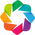

:Sankey   [From,To]   (Count)

In [5]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')

# Import Data
data_df = pd.read_hdf('/Users/joaburkh/Library/CloudStorage/GoogleDrive-joaburkh@umich.edu/Other computers/My Laptop/UMich_MSE_PhD/UMich_SI649_InformationVisualization/Project_StaticViz/TRAC_AsylumDecisions_Cleaned.hdf', key='AsylumDecisions_2021to2024')

# Process Data
year = 2011
year_data_df = data_df.loc[(year)]

year_data_df['Percentage'] = 100*year_data_df['Total']/year_data_df['Total'].sum()

year_data_df.loc[~(year_data_df==0).all(axis=1)]    # remove rows with all zeros
year_data_df = year_data_df[~(year_data_df['Percentage'] < 0.001)]  # only look at top countries/regions

year_data_df = year_data_df.groupby('Region').sum()                # TODO: have the top several countries and then everything else is just 'Other [Region]'

# Nodes
possible_regions = list(year_data_df.index.unique(0))
possible_decisions = list(year_data_df.drop(['Total', 'Percentage'], axis=1).columns)
nodes = possible_regions + ['Immigration Court'] + possible_decisions
nodes_ds = hv.Dataset(enumerate(nodes), 'index', 'label')

# Edges
court_index = nodes.index('Immigration Court')

edges_to_court = [(nodes.index(r[0]), court_index, r[1].iloc[0]) for r in pd.DataFrame(year_data_df['Total']).iterrows()]

data_from_court_df = pd.DataFrame(year_data_df.sum(axis=0).drop(['Total', 'Percentage']), columns=['Total'])
data_from_court_df['Percentage'] = 100*data_from_court_df['Total']/data_from_court_df['Total'].sum()
edges_from_court = [(court_index, nodes.index(r[0]), r[1].iloc[0]) for r in pd.DataFrame(data_from_court_df['Total']).iterrows()]

edges_from_rejected = []
edges_from_deported = []

# Plot
value_dim = hv.Dimension('Count', unit='')

sankey_plot = hv.Sankey((edges_to_court+edges_from_court, nodes_ds), ['From', 'To'], vdims=value_dim)
sankey_plot.opts(labels='label')

In [161]:
nodes

['Africa',
 'America',
 'Asia',
 'Atlantic',
 'Carribbean',
 'Europe',
 'Indian Ocean',
 'Mediterranean',
 'North America',
 'Oceania',
 'Other',
 'South America',
 'Stateless',
 'Immigration Court',
 'Asylum Relief Denied',
 'Asylum Granted',
 'Other Relief Granted',
 'Total',
 'Percentage']

In [157]:
(1,2,3) + (4, 5, 6)

(1, 2, 3, 4, 5, 6)

In [149]:
year_data_df

,Asylum Relief Denied,Asylum Granted,Other Relief Granted,Total,Percentage
Region,,,,,
Africa,1926,1823,99,3848,15.368640
America,1857,310,56,2223,8.878505
Asia,5517,5175,150,10842,43.302181
Atlantic,1,0,0,1,0.003994
Carribbean,2758,456,36,3250,12.980270
Europe,1123,1065,29,2217,8.854541
Indian Ocean,1,0,0,1,0.003994
Mediterranean,110,82,7,199,0.794792
North America,4,0,0,4,0.015976
